# Costa Rican poverty

You can find the data here: https://www.kaggle.com/c/costa-rican-household-poverty-prediction

with Mkrtich Ohanyan: https://www.mkrtich.com/

In [39]:
import os 

#Find csv files
training=os.path.abspath('train.csv')
testing=os.path.abspath('test.csv')

In [40]:
import numpy as np 
import pandas as pd

#Read training and testing data.
train=pd.read_csv(training)
test=pd.read_csv(testing)

In the next two cells, I renamed each of the columns.

In [41]:
train=train.rename(columns={'hacdor':'overcrowding by bedrooms','v2a1':'rent/month','hacapo':'overcrowding rooms',
                 'v14a':'total bathrooms','v18q':'tablet','v18q1':'# tablets','r4h1':'boys','r4h2':'teens/men',
                 'r4h3':'total men','r4m1':'girls','r4m2':'teens/women','r4m3':'total women','r4t1':'total youth',
                 'r4t2':'total teens/adults','r4t3':'total people','tamhog':'size of household','tamviv':'number of people in house',
                 'escolari':'years of school','rez_esc':'years behind school','hhsize':'household size'})

test=test.rename(columns={'hacdor':'overcrowding by bedrooms','v2a1':'rent/month','hacapo':'overcrowding rooms',
                 'v14a':'total bathrooms','v18q':'tablet','v18q1':'# tablets','r4h1':'boys','r4h2':'teens/men',
                 'r4h3':'total men','r4m1':'girls','r4m2':'teens/women','r4m3':'total women','r4t1':'total youth',
                 'r4t2':'total teens/adults','r4t3':'total people','tamhog':'size of household','tamviv':'number of people in house',
                 'escolari':'years of school','rez_esc':'years behind school','hhsize':'household size'})

In [42]:
train=train.rename(columns={'paredblolad':'brick house','paredzocalo':'socket house','paredpreb':'cement house','pareddes':'waste house','paredmad':'wood house',
                           'paredzinc':'zinc house','paredfibras':'natural fibers house','paredother':'other house','pisomoscer':'ceramic floor','pisocemento':'cement floor',
                           'pisoother':'other floor','pisonatur':'natural floor','pisonotiene':'no floor','pisomadera':'wood floor','techozinc':'metal roof','techoentrepiso':'fiber cement roof',
                           'techocane':'natural fiber roof','techootro':'other roof','cielorazo':'has ceiling','abastaguadentro':'indoor water','abastaguafuera':'outdoor water','abastaguano':'no water',
                           'public':'public electric','planpri':'private electric','noelec':'no electric','coopele':'electric from coop','sanitario1':'no toilet','sanitario2':'sewer','sanitario3':'septic','sanitario5':'letrine',
                           'sanitario6':'other toilet','energcocinar1':'no kitchen','energcocinar2':'cooking electric','energcocinar3':'cooking gas','energcocinar4':'cooking charcoal','elimbasu1':'garbage truck',
                           'elimbasu2':'garbage landfill','elimbasu3':'garbage burning','elimbasu4':'garbage outside','elimbasu5':'garbage river','elimbasu6':'garbage other',
                           'epared1':'walls bad','epared2':'walls regular','epared3':'walls good','etecho1':'roof bad','etecho2':'roof regular','etecho3':'roof good',
                           'eviv1':'floor bad','eviv2':'floor regular','eviv3':'floor good','dis':'disabled','estadocivil1':'less than 10','estadocivil2':'coupled union',
                           'estadocivil3':'married','estadocivil4':'divorced','estadocivil5':'separated','estadocivil6':'widowed','estadocivil7':'single','parentesco1':'household_head',
                           'parentesco2':'spouse','parentesco3':'son/daughter','parentesco4':'stepson/daughter','parentesco5':'son/daughter in law','parentesco6':'grandson/daughter',
                           'parentesco7':'mother/father','parentesco8':'mother/father in law','parentesco9':'brother/sister','parentesco10':'brother/sister in law',
                           'parentesco11':'other family','parentesco12':'non family','idhogar':'household identifier','hogar_nin':'# of children','hogar_adul':'# adults',
                           'hogar_mayor':'# elders','hogar_total':'total household members','edjefe':'years education male head','edjefa':'years education female head',
                           'meaneduc':'average years education','instlevel1':'no education','instlevel2':'incomplete primary','instlevel3':'complete primary',
                           'instlevel4':'incomplete secondary','instlevel5':'complete secondary','instlevel6':'incomplete technical secondary','instlevel7':'complete technical secondary',
                           'instlevel8':'undergrad and higher ed','instlevel9':'postgrad higher ed','tipovivi1':'own fully paid house','tipovivi2':'own paying house','tipovivi3':'rented',
                           'tipovivi4':'precarious housing','tipovivi5':'other housing','qmobilephone':'number of cell phones','lugar1':'central region','lugar2':'chorotega',
                           'lugar3':'pacific central','lugar4':'brunca','lugar5':'huetar atlantic','lugar6':'huetar north','area1':'urban','area2':'rural'})
test=test.rename(columns={'paredblolad':'brick house','paredzocalo':'socket house','paredpreb':'cement house','pareddes':'waste house','paredmad':'wood house',
                           'paredzinc':'zinc house','paredfibras':'natural fibers house','paredother':'other house','pisomoscer':'ceramic floor','pisocemento':'cement floor',
                           'pisoother':'other floor','pisonatur':'natural floor','pisonotiene':'no floor','pisomadera':'wood floor','techozinc':'metal roof','techoentrepiso':'fiber cement roof',
                           'techocane':'natural fiber roof','techootro':'other roof','cielorazo':'has ceiling','abastaguadentro':'indoor water','abastaguafuera':'outdoor water','abastaguano':'no water',
                           'public':'public electric','planpri':'private electric','noelec':'no electric','coopele':'electric from coop','sanitario1':'no toilet','sanitario2':'sewer','sanitario3':'septic','sanitario5':'letrine',
                           'sanitario6':'other toilet','energcocinar1':'no kitchen','energcocinar2':'cooking electric','energcocinar3':'cooking gas','energcocinar4':'cooking charcoal','elimbasu1':'garbage truck',
                           'elimbasu2':'garbage landfill','elimbasu3':'garbage burning','elimbasu4':'garbage outside','elimbasu5':'garbage river','elimbasu6':'garbage other',
                           'epared1':'walls bad','epared2':'walls regular','epared3':'walls good','etecho1':'roof bad','etecho2':'roof regular','etecho3':'roof good',
                           'eviv1':'floor bad','eviv2':'floor regular','eviv3':'floor good','dis':'disabled','estadocivil1':'less than 10','estadocivil2':'coupled union',
                           'estadocivil3':'married','estadocivil4':'divorced','estadocivil5':'separated','estadocivil6':'widowed','estadocivil7':'single','parentesco1':'household_head',
                           'parentesco2':'spouse','parentesco3':'son/daughter','parentesco4':'stepson/daughter','parentesco5':'son/daughter in law','parentesco6':'grandson/daughter',
                           'parentesco7':'mother/father','parentesco8':'mother/father in law','parentesco9':'brother/sister','parentesco10':'brother/sister in law',
                           'parentesco11':'other family','parentesco12':'non family','idhogar':'household identifier','hogar_nin':'# of children','hogar_adul':'# adults',
                           'hogar_mayor':'# elders','hogar_total':'total household members','edjefe':'years education male head','edjefa':'years education female head',
                           'meaneduc':'average years education','instlevel1':'no education','instlevel2':'incomplete primary','instlevel3':'complete primary',
                           'instlevel4':'incomplete secondary','instlevel5':'complete secondary','instlevel6':'incomplete technical secondary','instlevel7':'complete technical secondary',
                           'instlevel8':'undergrad and higher ed','instlevel9':'postgrad higher ed','tipovivi1':'own fully paid house','tipovivi2':'own paying house','tipovivi3':'rented',
                           'tipovivi4':'precarious housing','tipovivi5':'other housing','qmobilephone':'number of cell phones','lugar1':'central region','lugar2':'chorotega',
                           'lugar3':'pacific central','lugar4':'brunca','lugar5':'huetar atlantic','lugar6':'huetar north','area1':'urban','area2':'rural'})

I found that in the '# tablets' column, the 'Nan's represented '0' tablets.

In [43]:
train['# tablets']=train['# tablets'].fillna(0)
train['# tablets']=train['# tablets'].astype('int64')
test['# tablets']=test['# tablets'].fillna(0)
test['# tablets']=test['# tablets'].astype('int64')

Since there are so many features, I create arrays with categories to get a better sense of the features.

In [44]:
household=['boys','teens/men','total men','girls','teens/women','total women','total youth','total teens/adults','total people','size of household','number of people in house','household size']
school=['years of school','years behind school','years education male head','years education female head','average years education','no education',
        'incomplete primary','complete primary','incomplete secondary','complete secondary','incomplete technical secondary','complete technical secondary',
        'undergrad and higher ed','postgrad higher ed']
housematerials=['brick house','socket house','cement house','waste house','wood house','zinc house',
                'natural fibers house','other house','ceramic floor','cement floor','other floor','natural floor',
                'no floor','wood floor','metal roof','fiber cement roof','natural fiber roof','other roof','has ceiling',
                'indoor water','outdoor water','no water','public electric','private electric','no electric','electric from coop',
                'no toilet','sewer','septic','letrine','other toilet','no kitchen','cooking electric','cooking gas',
                'cooking charcoal','garbage truck','garbage landfill','garbage burning','garbage outside','garbage river','garbage other',
                'walls bad','walls regular','walls good','roof bad','roof regular','roof good','floor bad','floor regular','floor good']


In [45]:
familymembers=['disabled','less than 10','coupled union','married','divorced','separated','widowed',
               'single','household_head','spouse','son/daughter','stepson/daughter','son/daughter in law','grandson/daughter',
               'mother/father','mother/father in law','brother/sister','brother/sister in law','other family','non family',]
rentstatus=['own fully paid house','own paying house','rented','precarious housing','other housing']
region=['central region','chorotega','pacific central','brunca','huetar atlantic','huetar north']
urbanrural=['urban','rural']

I create new columns which combine features. For example, instead of having two columns, 'urban' and 'rural', I create a new column 'urbanrural' where urban=1 and rural=2. 

In [46]:
train['urbanrural']=train['urban']+2*train['rural']
test['urbanrural']=test['urban']+2*test['rural']

train['marital status']=train['coupled union']+2*train['married']+3*train['divorced']+4*train['separated']+5*train['widowed']+6*train['single']
test['marital status']=test['coupled union']+2*test['married']+3*test['divorced']+4*test['separated']+5*test['widowed']+6*test['single']

train['rent status']=train['other housing']+2*train['precarious housing']+3*train['rented']+4*train['own paying house']+5*train['own fully paid house']
test['rent status']=test['other housing']+2*test['precarious housing']+3*test['rented']+4*test['own paying house']+5*test['own fully paid house']

train['region']=train['central region']+2*train['chorotega']+3*train['pacific central']+4*train['brunca']+5*train['huetar atlantic']+6*train['huetar north']
test['region']=test['central region']+2*test['chorotega']+3*test['pacific central']+4*test['brunca']+5*test['huetar atlantic']+6*test['huetar north']

train['house type']=train['brick house']+2*train['socket house']+3*train['waste house']+4*train['wood house']+5*train['zinc house']+6*train['natural fibers house']+7*train['other house']
test['house type']=test['brick house']+2*test['socket house']+3*test['waste house']+4*test['wood house']+5*test['zinc house']+6*test['natural fibers house']+7*test['other house']

train['roof']=train['metal roof']+2*train['fiber cement roof']+3*train['natural fiber roof']+4*train['other roof']
test['roof']=test['metal roof']+2*test['fiber cement roof']+3*test['natural fiber roof']+4*test['other roof']

In [47]:
train['floor']=train['no floor']+2*train['cement floor']+3*train['other floor']+4*train['natural floor']+5*train['ceramic floor']+6*train['wood floor']
test['floor']=test['no floor']+2*test['cement floor']+3*test['other floor']+4*test['natural floor']+5*test['ceramic floor']+6*test['wood floor']

train['water']=train['no water']+2*train['outdoor water']+3*train['indoor water']
test['water']=test['no water']+2*test['outdoor water']+3*test['indoor water']

train['electric']=train['no electric']+2*train['electric from coop']+3*train['public electric']+4*train['private electric']
test['electric']=test['no electric']+2*test['electric from coop']+3*test['public electric']+4*test['private electric']

train['toilet']=train['no toilet']+2*train['sewer']+3*train['septic']+4*train['letrine']+5*train['other toilet']
test['toilet']=test['no toilet']+2*test['sewer']+3*test['septic']+4*test['letrine']+5*test['other toilet']

train['kitchen']=train['no kitchen']+2*train['cooking electric']+3*train['cooking gas']+4*train['cooking charcoal']
test['kitchen']=test['no kitchen']+2*test['cooking electric']+3*test['cooking gas']+4*test['cooking charcoal']

train['garbage']=train['garbage truck']+2*train['garbage landfill']+3*train['garbage burning']+4*train['garbage outside']+5*train['garbage river']+6*train['garbage other']
test['garbage']=test['garbage truck']+2*test['garbage landfill']+3*test['garbage burning']+4*test['garbage outside']+5*test['garbage river']+6*test['garbage other']


In [48]:
train['walls_status']=train['walls bad']+2*train['walls regular']+3*train['walls good']
train['roof_status']=train['roof bad']+2*train['roof regular']+3*train['roof good']
train['floor_status']=train['floor bad']+2*train['floor regular']+3*train['floor good']

test['walls_status']=test['walls bad']+2*test['walls regular']+3*test['walls good']
test['roof_status']=test['roof bad']+2*test['roof regular']+3*test['roof good']
test['floor_status']=test['floor bad']+2*test['floor regular']+3*test['floor good']

In [49]:
house_status=['floor','water','electric','toilet','kitchen','garbage','walls_status','roof_status','floor_status']

In [50]:
train['badness']=(train[house_status] == 1).astype(int).sum(axis=1)
train['goodness']=(train[house_status] >= 3).astype(int).sum(axis=1)
test['badness']=(test[house_status] == 1).astype(int).sum(axis=1)
test['goodness']=(test[house_status] >= 3).astype(int).sum(axis=1)

In [51]:
train['school max']=train['no education']+2*train['incomplete primary']+3*train['complete primary']+4*train['incomplete secondary']+5*train['complete secondary']+6*train['incomplete technical secondary']+7*train['complete technical secondary']+8*train['undergrad and higher ed']+9*train['postgrad higher ed']
test['school max']=test['no education']+2*test['incomplete primary']+3*test['complete primary']+4*test['incomplete secondary']+5*test['complete secondary']+6*test['incomplete technical secondary']+7*test['complete technical secondary']+8*test['undergrad and higher ed']+9*test['postgrad higher ed']

Next, I looked at the missing data. 'years behind school' and 'rent/month' had high percentages of missing values.

In [52]:
#missing data
total = train.isnull().sum().sort_values(ascending=False)
percent = (train.isnull().sum()/train.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])

missing_data.head(20)

,Total,Percent
years behind school,7928,0.829549
rent/month,6860,0.717798
SQBmeaned,5,0.000523
average years education,5,0.000523
septic,0,0.000000
cooking charcoal,0,0.000000
cooking gas,0,0.000000
cooking electric,0,0.000000
no kitchen,0,0.000000
other toilet,0,0.000000


Next, I compare 'rent/month' with what kind of housing situation the person is in. 

In [53]:
housing=['rent/month','own fully paid house','own paying house','rented','precarious housing','other housing']
train[housing]

,rent/month,own fully paid house,own paying house,rented,precarious housing,other housing
0,190000.0,0,0,1,0,0
1,135000.0,0,0,1,0,0
2,NaN,1,0,0,0,0
3,180000.0,0,0,1,0,0
4,180000.0,0,0,1,0,0
...,...,...,...,...,...,...
9552,80000.0,0,0,1,0,0
9553,80000.0,0,0,1,0,0
9554,80000.0,0,0,1,0,0
9555,80000.0,0,0,1,0,0


In [54]:
is_NaN = train[housing].isnull()
row_has_NaN = is_NaN.any(axis=1)
rows_with_NaN = train[housing][row_has_NaN]

rows_with_NaN

,rent/month,own fully paid house,own paying house,rented,precarious housing,other housing
2,NaN,1,0,0,0,0
13,NaN,1,0,0,0,0
14,NaN,1,0,0,0,0
26,NaN,1,0,0,0,0
32,NaN,1,0,0,0,0
...,...,...,...,...,...,...
9542,NaN,1,0,0,0,0
9543,NaN,1,0,0,0,0
9544,NaN,1,0,0,0,0
9550,NaN,1,0,0,0,0


It looks like most of the people that have 'Nan' 'rent/month' actually own their house. So it makes sense to put zeros in place of those 'Nan's. 

In [55]:
train['rent/month']=train['rent/month'].fillna(0)
train['rent/month']=train['rent/month'].astype('int64')
test['rent/month']=test['rent/month'].fillna(0)
test['rent/month']=test['rent/month'].astype('int64')
train

,Id,rent/month,overcrowding by bedrooms,rooms,overcrowding rooms,total bathrooms,refrig,tablet,# tablets,boys,...,electric,toilet,kitchen,garbage,walls_status,roof_status,floor_status,badness,goodness,school max
0,ID_279628684,190000,0,3,0,1,1,0,0,0,...,3,2,3,1,2,1,1,3,4,4
1,ID_f29eb3ddd,135000,0,4,0,1,1,1,1,0,...,3,2,2,1,2,2,2,1,3,8
2,ID_68de51c94,0,0,8,0,1,1,0,0,0,...,3,2,2,1,2,3,3,1,5,5
3,ID_d671db89c,180000,0,5,0,1,1,1,1,0,...,3,2,2,1,3,3,3,1,6,4
4,ID_d56d6f5f5,180000,0,5,0,1,1,1,1,0,...,3,2,2,1,3,3,3,1,6,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9552,ID_d45ae367d,80000,0,6,0,1,1,0,0,0,...,2,3,3,2,2,2,2,0,3,4
9553,ID_c94744e07,80000,0,6,0,1,1,0,0,0,...,2,3,3,2,2,2,2,0,3,1
9554,ID_85fc658f8,80000,0,6,0,1,1,0,0,0,...,2,3,3,2,2,2,2,0,3,2
9555,ID_ced540c61,80000,0,6,0,1,1,0,0,0,...,2,3,3,2,2,2,2,0,3,5


Next, let's look at the 'years behind school'.

In [56]:
school=['years behind school','years education male head','years education female head','average years education','no education','incomplete primary','complete primary',
                           'incomplete secondary','complete secondary','incomplete technical secondary','complete technical secondary','undergrad and higher ed','postgrad higher ed']
train[school]

,years behind school,years education male head,years education female head,average years education,no education,incomplete primary,complete primary,incomplete secondary,complete secondary,incomplete technical secondary,complete technical secondary,undergrad and higher ed,postgrad higher ed
0,NaN,10,no,10.00,0,0,0,1,0,0,0,0,0
1,NaN,12,no,12.00,0,0,0,0,0,0,0,1,0
2,NaN,no,11,11.00,0,0,0,0,1,0,0,0,0
3,1.0,11,no,11.00,0,0,0,1,0,0,0,0,0
4,NaN,11,no,11.00,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9552,NaN,9,no,8.25,0,0,0,1,0,0,0,0,0
9553,NaN,9,no,8.25,1,0,0,0,0,0,0,0,0
9554,NaN,9,no,8.25,0,1,0,0,0,0,0,0,0
9555,NaN,9,no,8.25,0,0,0,0,1,0,0,0,0


From the information on kaggle, we can replace 'no's with 0 and 'yes'es with 1 in the following features: 'years education male head', 'years education female head', 'dependency'.

In [57]:
train['years education male head']=train['years education male head'].replace('no',0)
train['years education male head']=train['years education male head'].replace('yes',1)
train['years education female head']=train['years education female head'].replace('no',0)
train['years education female head']=train['years education female head'].replace('yes',1)
train['dependency']=train['dependency'].replace('no',0)
train['dependency']=train['dependency'].replace('yes',1)
train['dependency']=train['dependency'].astype('float64')

In [58]:
test['years education male head']=test['years education male head'].replace('no',0)
test['years education male head']=test['years education male head'].replace('yes',1)
test['years education female head']=test['years education female head'].replace('no',0)
test['years education female head']=test['years education female head'].replace('yes',1)
test['dependency']=test['dependency'].replace('no',0)
test['dependency']=test['dependency'].replace('yes',1)
test['dependency']=test['dependency'].astype('float64')

We drop all the columns made redundant by cells 8-18.

In [59]:
to_drop=['years behind school','household identifier','household size','no education',
        'incomplete primary','complete primary','incomplete secondary','complete secondary','incomplete technical secondary','complete technical secondary',
        'undergrad and higher ed','postgrad higher ed',
         'ceramic floor','cement floor','other floor','natural floor','no floor','wood floor',
         'brick house','socket house','cement house','waste house','wood house','zinc house','natural fibers house','other house',
         'metal roof','fiber cement roof','natural fiber roof','other roof',
         'indoor water','outdoor water','no water',
         'public electric','private electric','no electric','electric from coop',
         'no toilet','sewer','septic','letrine','other toilet',
         'no kitchen','cooking electric','cooking gas','cooking charcoal',
         'garbage truck','garbage landfill','garbage burning','garbage outside','garbage river','garbage other',
         'walls bad','walls regular','walls good',
         'roof bad','roof regular','roof good',
         'floor bad','floor regular','floor good',
         'coupled union','married','divorced','separated','widowed','single',
         'own fully paid house','own paying house','rented','precarious housing','other housing',
         'central region','chorotega','pacific central','brunca','huetar atlantic','huetar north',
         'urban','rural',
         'spouse','son/daughter','stepson/daughter','son/daughter in law','grandson/daughter','mother/father','mother/father in law','brother/sister','brother/sister in law','other family','non family']

train=train.drop(to_drop,axis=1)
test=test.drop(to_drop,axis=1)

In [60]:
train=train.fillna(0)
test=test.fillna(0)

train['years education male head']=train['years education male head'].astype('int64')
train['years education female head']=train['years education female head'].astype('int64')
test['years education male head']=test['years education male head'].astype('int64')
test['years education female head']=test['years education female head'].astype('int64')

In [61]:
train.query('household_head==1')

,Id,rent/month,overcrowding by bedrooms,rooms,overcrowding rooms,total bathrooms,refrig,tablet,# tablets,boys,...,electric,toilet,kitchen,garbage,walls_status,roof_status,floor_status,badness,goodness,school max
0,ID_279628684,190000,0,3,0,1,1,0,0,0,...,3,2,3,1,2,1,1,3,4,4
1,ID_f29eb3ddd,135000,0,4,0,1,1,1,1,0,...,3,2,2,1,2,2,2,1,3,8
2,ID_68de51c94,0,0,8,0,1,1,0,0,0,...,3,2,2,1,2,3,3,1,5,5
5,ID_ec05b1a7b,180000,0,5,0,1,1,1,1,0,...,3,2,2,1,3,3,3,1,6,5
8,ID_1284f8aad,130000,1,2,0,1,1,0,0,0,...,3,2,3,1,1,1,2,3,4,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9535,ID_18b0a845b,0,0,4,0,1,0,0,0,1,...,2,2,4,3,2,2,2,0,2,2
9541,ID_a31274054,0,0,3,0,0,0,0,0,2,...,0,4,4,3,2,1,2,2,4,2
9545,ID_32a00a8bf,46500,0,5,0,1,1,0,0,1,...,2,3,3,1,2,2,2,1,3,2
9551,ID_79d39dddc,0,0,3,0,1,1,0,0,0,...,2,3,3,3,3,3,3,0,8,1


We drop the columns which are highly correlated to each other.

In [62]:
# Create correlation matrix
corr_matrix = train.query('household_head==1').corr()

# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

# Find index of feature columns with correlation greater than 0.9
to_drop = [column for column in upper.columns if any(abs(upper[column]) > 0.9)]

to_drop

['size of household',
 'number of people in house',
 'female',
 'total household members',
 'SQBescolari',
 'SQBage',
 'SQBhogar_total',
 'SQBedjefe',
 'SQBovercrowding',
 'SQBdependency',
 'SQBmeaned',
 'agesq',
 'school max']

In [63]:
train=train.drop(to_drop,axis=1)
test=test.drop(to_drop,axis=1)

We create X and y. 

In [64]:
X = train.query('household_head==1')

X = X.drop(['Target'], axis=1)
X=train.drop('Target',axis=1)

X=X.drop('Id',axis=1)
y=train['Target']


In [65]:
# Label encoding for categoricals
for colname in X.select_dtypes("object"):
    X[colname], _ = X[colname].factorize()

# All discrete features should now have integer dtypes (double-check this before using MI!)
discrete_features = X.dtypes == int

In [66]:
discrete_features

rent/month                      True
overcrowding by bedrooms        True
rooms                           True
overcrowding rooms              True
total bathrooms                 True
refrig                          True
tablet                          True
# tablets                       True
boys                            True
teens/men                       True
total men                       True
girls                           True
teens/women                     True
total women                     True
total youth                     True
total teens/adults              True
total people                    True
years of school                 True
has ceiling                     True
disabled                        True
male                            True
less than 10                    True
household_head                  True
# of children                   True
# adults                        True
# elders                        True
dependency                     False
y

Make sure there is no more missing data.

In [67]:
#missing data
total = train.isnull().sum().sort_values(ascending=False)
percent = (train.isnull().sum()/train.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])

missing_data.head(20)

,Total,Percent
goodness,0,0.0
dependency,0,0.0
# adults,0,0.0
# of children,0,0.0
household_head,0,0.0
less than 10,0,0.0
male,0,0.0
disabled,0,0.0
has ceiling,0,0.0
years of school,0,0.0


In [68]:
from sklearn.feature_selection import mutual_info_regression

def make_mi_scores(X, y, discrete_features):
    mi_scores = mutual_info_regression(X, y, discrete_features=discrete_features)
    mi_scores = pd.Series(mi_scores, name="MI Scores", index=X.columns)
    mi_scores = mi_scores.sort_values(ascending=False)
    return mi_scores

mi_scores = make_mi_scores(X, y, discrete_features)
mi_scores# show a few features with their MI scores

rent/month                     0.262685
average years education        0.158827
dependency                     0.108405
SQBhogar_nin                   0.071463
# of children                  0.071463
years education male head      0.062464
overcrowding                   0.060715
years of school                0.056834
years education female head    0.050905
total youth                    0.049420
has ceiling                    0.048264
floor_status                   0.047059
rooms                          0.045745
# tablets                      0.044480
floor                          0.042369
walls_status                   0.040192
tablet                         0.040165
number of cell phones          0.037727
girls                          0.037014
roof_status                    0.036412
house type                     0.035420
rent status                    0.031388
goodness                       0.030970
# adults                       0.029626
badness                        0.029090


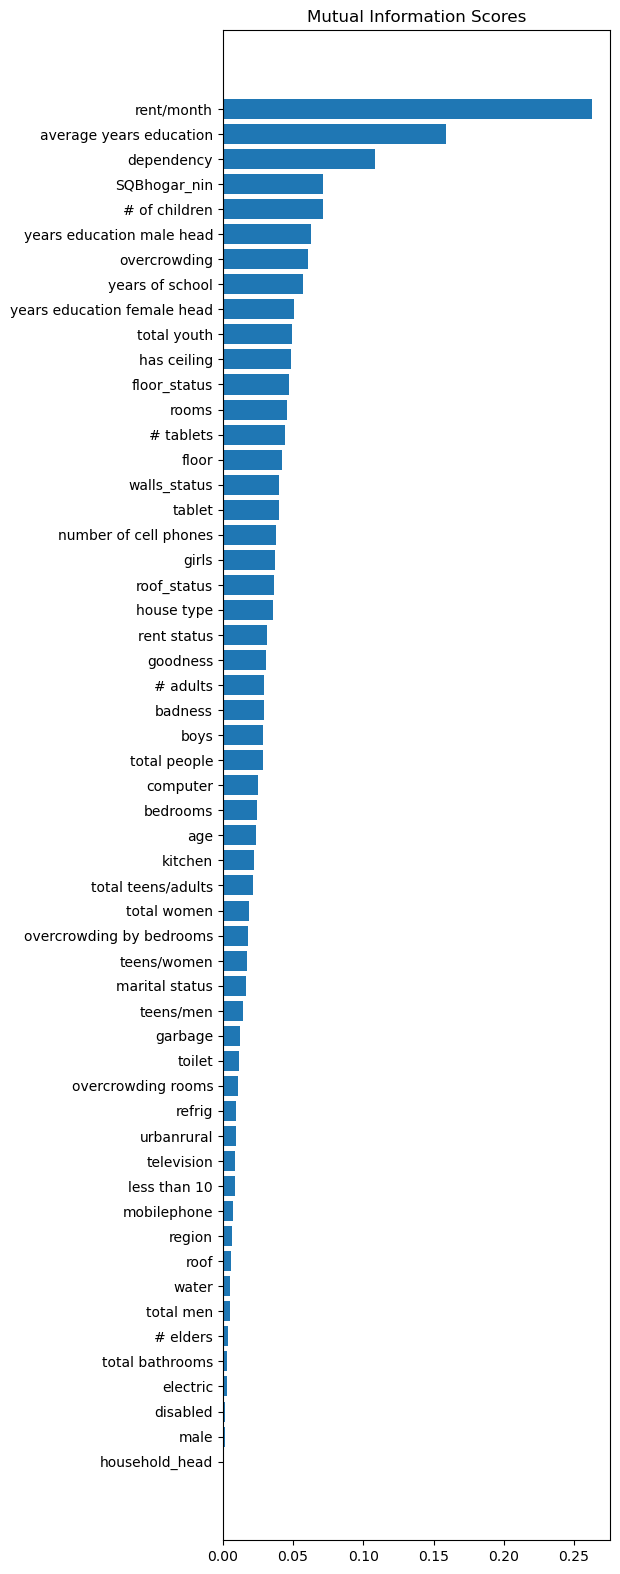

In [69]:
import matplotlib.pyplot as plt
def plot_mi_scores(scores):
    scores = scores.sort_values(ascending=True)
    width = np.arange(len(scores))
    ticks = list(scores.index)
    plt.barh(width, scores)
    plt.yticks(width, ticks)
    plt.title("Mutual Information Scores")


plt.figure(dpi=100, figsize=(5, 20))
plot_mi_scores(mi_scores)

In [70]:
discrete_features=['rent/month','SQBmeaned','average years education','dependency','SQBdependency','SQBovercrowding','SQBedjefe','years education male head','SQBhogar_nin','# of children','years of school','SQBescolari','overcrowding','school max','has ceiling','total youth','years education female head','rooms','walls','floor','girls','# tablets','number of cell phones','# adults','roof','house type','tablet','number of people in house','total household members','SQBhogar_total','size of household','total people','agesq','age']

In [71]:
X.columns

Index(['rent/month', 'overcrowding by bedrooms', 'rooms', 'overcrowding rooms',
       'total bathrooms', 'refrig', 'tablet', '# tablets', 'boys', 'teens/men',
       'total men', 'girls', 'teens/women', 'total women', 'total youth',
       'total teens/adults', 'total people', 'years of school', 'has ceiling',
       'disabled', 'male', 'less than 10', 'household_head', '# of children',
       '# adults', '# elders', 'dependency', 'years education male head',
       'years education female head', 'average years education', 'bedrooms',
       'overcrowding', 'computer', 'television', 'mobilephone',
       'number of cell phones', 'age', 'SQBhogar_nin', 'urbanrural',
       'marital status', 'rent status', 'region', 'house type', 'roof',
       'floor', 'water', 'electric', 'toilet', 'kitchen', 'garbage',
       'walls_status', 'roof_status', 'floor_status', 'badness', 'goodness'],
      dtype='object')

Train-test-split

In [72]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=0)

I used XGBClassifier.

In [79]:
import xgboost
from xgboost import XGBClassifier

cat1 = XGBClassifier(n_estimators=500,
                     learning_rate=1,
                     #early_stopping_rounds=5,
                    # tree_method='gpu_hist',
                     max_depth=4).fit(X_train,y_train)
y_cat=cat1.predict(X_test)

/Users/qefsquintillion/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[11:30:00] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [80]:
from sklearn.metrics import f1_score
f1_score(y_test, y_cat, average='macro')

0.8982753632756538

In [84]:
new_test=test.drop('Id',axis=1)


In [85]:
prediction=cat1.predict(new_test)

In [86]:
d = {'Id': test.Id, 'Target': prediction}

my_submission = pd.DataFrame(data=d)

my_submission.to_csv('submission.csv', index=False)